### Preparacion de los datos 

In [48]:
import pandas as pd
import numpy as np
import networkx as nx
#%matplotlib notebook
import matplotlib.pyplot as plt

import os
import operator
import warnings
#warnings.filterwarnings('ignore')
import plotly.graph_objects as go


In [49]:
cols_list=["Source airport","Destination airport"]
G_df = pd.read_csv('routes.csv',usecols=cols_list)#solo tiene 2 columnas por CODIGOS
#Count_df = pd.read_csv('D:/Personal and studies/College/Semester 6/Social and information networks project/countries.txt')
cols_list=["City","Country","IATA","Latitude","Longitude"]
airport_df = pd.read_csv('airports.csv',usecols=cols_list)#5 columnas 

In [50]:
G_df.head(5)

,Source airport,Destination airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [51]:
airport_df.head(5)

,City,Country,IATA,Latitude,Longitude
0,Goroka,Papua New Guinea,GKA,-6.081690,145.391998
1,Madang,Papua New Guinea,MAG,-5.207080,145.789001
2,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005
3,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977
4,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001


node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

In [52]:
G_df['country']=airport_df['Country']
G_df.head(25)

,Source airport,Destination airport,country
0,AER,KZN,Papua New Guinea
1,ASF,KZN,Papua New Guinea
2,ASF,MRV,Papua New Guinea
3,CEK,KZN,Papua New Guinea
4,CEK,OVB,Papua New Guinea
5,DME,KZN,Papua New Guinea
6,DME,NBC,Greenland
7,DME,TGK,Greenland
8,DME,UUA,Greenland
9,EGO,KGD,Greenland


### El mas dinamico

In [53]:

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(G_df.head(25), 'Source airport', 'Destination airport',create_using=nx.DiGraph())

# Calculate the number of connections for each node
node_adjacencies = [len(adjacencies) for node, adjacencies in G.adjacency()]


# Create a trace for nodes with different sizes based on the number of connections
node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Use the 'Viridis' colorscale
        size=10,
        color=node_adjacencies,# Assign node_adjacencies directly to the color attribute
        opacity=1,#
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right',
            tickvals=[min(node_adjacencies), max(node_adjacencies)],
            ticktext=[str(min(node_adjacencies)), str(max(node_adjacencies))],
        ),
        line_width=2)
)



# Calculate the layout of the graph (positions of nodes)
pos = nx.spring_layout(G)

# Set the layout coordinates for the nodes in the node trace
node_trace.x = [pos[node][0] for node in G.nodes()]
node_trace.y = [pos[node][1] for node in G.nodes()]

# Set the size and text attributes based on the number of connections
#node_trace.marker.size = node_adjacencies
#node_trace.text = ['# of connections: ' + str(adjacencies) for adjacencies in node_adjacencies]
#Para el tamaño de nodos 
factor=3
node_trace.marker.size = [factor * size for size in node_adjacencies]  
node_trace.text = ['# of connections: ' + str(adjacencies) for adjacencies in node_adjacencies]

# Create a trace for edges using the layout information
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=2, color='#889'),
    hoverinfo='none'
)



# Set the text attribute based on airport-related information
nodes_with_attributes = list(G.nodes(data=True))
node_trace.text = [
    f'Node: {node}, # of connections: {adjacencies}'
    for (node, _), adjacencies in zip(nodes_with_attributes, node_adjacencies)
]



# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=10, l=5, r=5, t=10),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

# Show the figure
fig.show()

### El mas simple con Mathplot: En las aristas

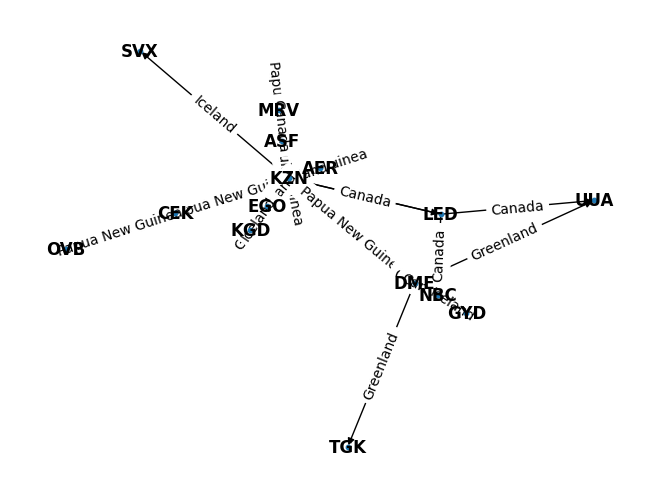

In [54]:


import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
data_s_d_c=G_df.head(25)
# Assuming your DataFrame is named 'G_df'
G = nx.from_pandas_edgelist(data_s_d_c, 'Source airport', 'Destination airport', edge_attr='country', create_using=nx.DiGraph())

pos = nx.spring_layout(G)

# Draw the graph using Matplotlib
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=10)

# You can use this line to draw edge labels if needed
edge_labels = nx.get_edge_attributes(G, 'country')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()





### El mas simple con mathplotlib: Como otros nodos

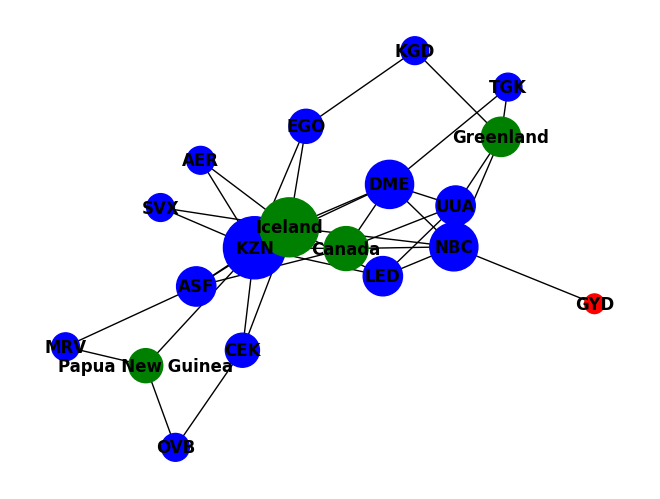

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
data_s_d_c = G_df.head(25)

# Assuming your DataFrame is named 'df'
G = nx.from_pandas_edgelist(data_s_d_c, data_s_d_c.columns[0], data_s_d_c.columns[1], create_using=nx.Graph())

# Add edges between the second and third columns
G.add_edges_from(zip(data_s_d_c[data_s_d_c.columns[1]], data_s_d_c[data_s_d_c.columns[2]]))

# Get the unique values from each column
column1_values = data_s_d_c[data_s_d_c.columns[0]].unique()
column2_values = data_s_d_c[data_s_d_c.columns[1]].unique()
column3_values = data_s_d_c[data_s_d_c.columns[2]].unique()

# Create a dictionary to map each unique value to a color
color_map = {}
for i, value in enumerate(column1_values):
    color_map[value] = 'red'
for i, value in enumerate(column2_values):
    color_map[value] = 'blue'
for i, value in enumerate(column3_values):
    color_map[value] = 'green'

# Calculate the number of connections for each node
node_adjacencies = [len(adjacencies) for node, adjacencies in G.adjacency()]

# Set the size and color attributes based on the number of connections and column values
node_sizes = [200 * size for size in node_adjacencies]  # Increase the node size
node_colors = [color_map[node] for node in G.nodes()]

# Draw the graph using Matplotlib
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_sizes, node_color=node_colors, arrows=True, arrowsize=20)  # Increase the arrowsize

plt.show()

#Another way to visualize the graph is by using Plotly. This library allows you to create interactive visualizations that can be easily shared with others. Here's how you can create a network graph using Plotly:





In [56]:
data_s_d_c.head(30)

,Source airport,Destination airport,country
0,AER,KZN,Papua New Guinea
1,ASF,KZN,Papua New Guinea
2,ASF,MRV,Papua New Guinea
3,CEK,KZN,Papua New Guinea
4,CEK,OVB,Papua New Guinea
5,DME,KZN,Papua New Guinea
6,DME,NBC,Greenland
7,DME,TGK,Greenland
8,DME,UUA,Greenland
9,EGO,KGD,Greenland
